 **Authors**

1. Mohlatlego Nakeng

2.  Raymond Chiruka


**Task description**

COVID-19 disease has now been added to the list of permanent health problems.  Even after the population has been vaccinated, the disease is still expected to stick around. This project aims to help the health institutions in South Africa with monitoring systems which may assist with rational health decision  making.We answer  the  question  of  which  feature most influenced the trend/spread of social media news. The project  also  looks  into  monitoring  the  societal  knowledge,behaviour and beliefs about COVID-19 disease based on social media texts. Exploratory data analysis (EDA) is used to learn the data distribution and nature for efficient modellingand analysis. The modelling appleid will be are qualitative data models for classification. We categorise the texts and train the models to effectively classify texts based on certain features.

**The main purpose of this task is to filter and extracted our data for training  and modellling.**

**Libraries**

In [ ]:
from google.colab import drive
import pandas as pd # for data frames
import matplotlib.pyplot as plt # to plot graphs
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the data**

*Warning* : This data will take a while to load, becuase of its high volume. The data consists of approxiametly a million inputs

This the columns objects mapped to data.

In [ ]:
labels = pd.read_excel("/content/drive/Shareddrives/MIT808 - group 6/data/23_03_2021_Library.xlsx")

In [ ]:
labels

,field_number,field_name
0,1,input_query
1,2,statuses_created_at
2,3,statuses_id
3,4,statuses_text
4,5,statuses_truncated
...,...,...
112,113,statuses_retweet_count
113,114,statuses_favorite_count
114,115,statuses_favorited
115,116,statuses_retweeted


Import the data mapped with the label columns

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/MIT808 - group 6/data/23_03_2021_MITDataset_Group3.csv")

In [ ]:
df.head()

,Unnamed: 0,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,...,statuses_retweeted_status_user_entities_url_urls[0]_indices[0],statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang
0,0,"vaccine AND ""South Africa""",Fri Jan 29 15:54:09 +0000 2021,1355182453799990016,RT @DrEricDing: BREAKINGâ€”Single-shot Johnson...,False,DrEricDing,Eric Feigl-Ding,1.883193e+07,1.883193e+07,3.0,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1267767504,1267767504,GameStonk,JesseDamiani,Views mine. He/him.,Emerging media @Forbes. EIC @TheSimule. Curato...,https://t.co/jref76s0xs,https://t.co/jref76s0xs,https://www.realitystudies.co/,realitystudies.co,0.0,https://t.co/0II6qX99k5,http://instagram.com/jessedamiani,instagram.com/jessedamiani,92.0,False,23654,584,402,Thu Mar 14 19:15:23 +0000 2013,30034,...,0.0,0.0,416692.0,7655.0,5383.0,Sat Jan 10 11:01:33 +0000 2009,150600.0,NaN,1.0,40392.0,0.0,0.0,0.0,3B94D9,http://abs.twimg.com/images/themes/theme19/bg.gif,https://abs.twimg.com/images/themes/theme19/bg...,1.0,http://pbs.twimg.com/profile_images/1296690786...,https://pbs.twimg.com/profile_images/129669078...,h

In [ ]:
del df["Unnamed: 0"] # removing index column

In [ ]:
df

,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,...,statuses_retweeted_status_user_entities_url_urls[0]_indices[0],statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang
0,"vaccine AND ""South Africa""",Fri Jan 29 15:54:09 +0000 2021,1355182453799990016,RT @DrEricDing: BREAKINGâ€”Single-shot Johnson...,False,DrEricDing,Eric Feigl-Ding,1.883193e+07,1.883193e+07,3.0,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1267767504,1267767504,GameStonk,JesseDamiani,Views mine. He/him.,Emerging media @Forbes. EIC @TheSimule. Curato...,https://t.co/jref76s0xs,https://t.co/jref76s0xs,https://www.realitystudies.co/,realitystudies.co,0.0,https://t.co/0II6qX99k5,http://instagram.com/jessedamiani,instagram.com/jessedamiani,92.0,False,23654,584,402,Thu Mar 14 19:15:23 +0000 2013,30034,24197,...,0.0,0.0,416692.0,7655.0,5383.0,Sat Jan 10 11:01:33 +0000 2009,150600.0,NaN,1.0,40392.0,0.0,0.0,0.0,3B94D9,http://abs.twimg.com/images/themes/theme19/bg.gif,https://abs.twimg.com/images/themes/theme19/bg...,1.0,http://pbs.twimg.com/profile_images/1296690786...,https://pbs.twimg.com/profile

**Exploring the data**

In [ ]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925344 entries, 0 to 925343
Data columns (total 117 columns):
 #   Column                                                             Dtype  
---  ------                                                             -----  
 0   input_query                                                        object 
 1   statuses_created_at                                                object 
 2   statuses_id                                                        int64  
 3   statuses_text                                                      object 
 4   statuses_truncated                                                 bool   
 5   statuses_entities_user_mentions[0]_screen_name                     object 
 6   statuses_entities_user_mentions[0]_name                            object 
 7   statuses_entities_user_mentions[0]_id                              float64
 8   statuses_entities_user_mentions[0]_id_str                          float64
 9   sta

In [ ]:
df.describe(include='all')

,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,...,statuses_retweeted_status_user_entities_url_urls[0]_indices[0],statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang
count,925344,925344,9.253440e+05,925344,925344,765420,765443,7.654460e+05,7.654460e+05,765446.000000,925344,925344,923416,8.163900e+04,8.163900e+04,8.653400e+04,8.653400e+04,86508,9.253440e+05,9.253440e+05,925281,925343,626822,778007,264227,264227,264000,263999,264227.0,46114,46114,46114,46114.000000,925344,9.253440e+05,9.253440e+05,925344.000000,925344,9.253440e+05,9.253440e+05,...,469507.0,668348.0,6.683480e+05,6.683480e+05,668348.000000,668348,6.683480e+05,0.0,668348.000000,6.683480e+05,668348.0,668348.000000,668348.000000,668348,522603,522603,668348.000000,668348,668348,632655,668348,668348,668348,668348,668348.000000,668348.000000,668348.000000,668348.000000,668348.000000,6.683480e+05,668348.0,668348.0,424717.000000,668348,925344,925344.000000,925344.000000,925344,925344,925344
unique,13,401254,NaN,361188,2,111357,108586,NaN,NaN,NaN,62,1,3051,NaN,NaN,NaN,NaN,53322,NaN,NaN,513968,562478,133530,467985,152117,152117,149017,1449

**Data Cleaning**

w*arning* : This will also take time

In [ ]:
# df['statuses_created_at'] =  pd.to_datetime(df['statuses_created_at'])
# df['statuses_created_at'] =  pd.to_datetime(df['statuses_user_created_at'])
# df['statuses_retweeted_status_user_created_at'] =  pd.to_datetime(df['statuses_retweeted_status_user_created_at'])

In [ ]:
df['sttsLang_Vs_isoCode'] = np.where((df['statuses_lang'] == df['statuses_metadata_iso_language_code']), 'Yes', 'No')

In [ ]:
comp_Yes=df[df['sttsLang_Vs_isoCode']=='Yes']
comp_No=df[df['sttsLang_Vs_isoCode']=='No']

In [ ]:
#filter out english tweets
data_en=df[df['statuses_metadata_iso_language_code']=='en']
print("No. of English  is {} and the No. of non-English is {}".format(str(len(data_en)), str(-(len(data_en)-len(df)))))
tweet_lang = {'English':len(data_en) , 'Non-English': -(len(data_en)-len(df))}
tweet_lang_data = pd.DataFrame(tweet_lang.items(),columns=['eng','non_eng'])

No. of English  is 755015 and the No. of non-English is 170329


<BarContainer object of 2 artists>

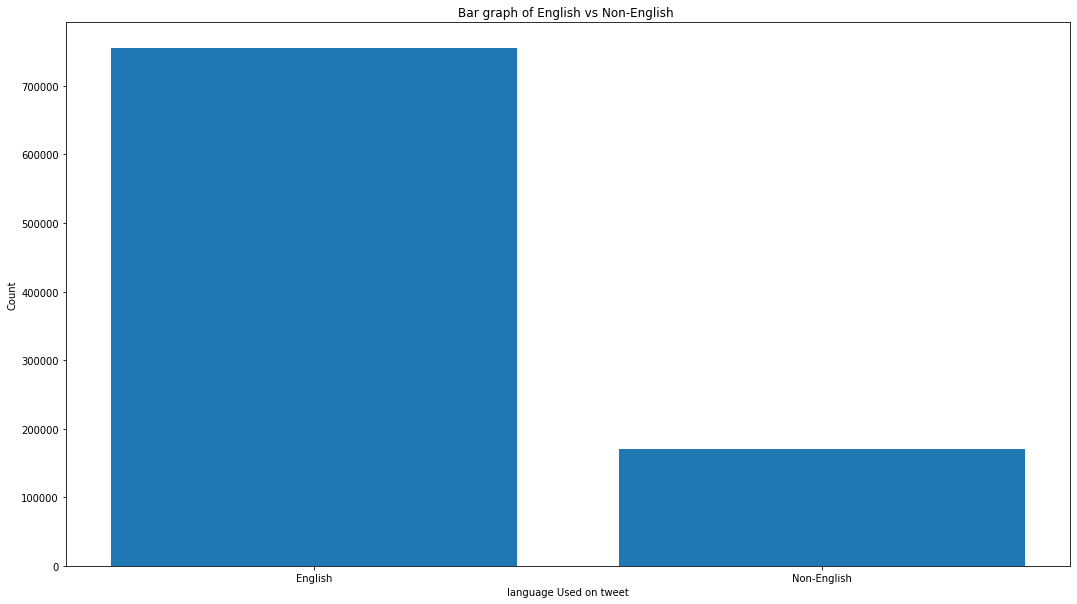

In [ ]:
ax = plt.subplots(figsize=(18,10))
plt.xlabel('language Used on tweet')
plt.ylabel('Count')
plt.title('Bar graph of English vs Non-English ')
plt.bar(tweet_lang_data['eng'], tweet_lang_data['non_eng'])

**Handling Null values**

In [ ]:
nulls=df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
  if row[0]>0:
    print(index, row[0])

statuses_entities_user_mentions[0]_screen_name 159924
statuses_entities_user_mentions[0]_name 159901
statuses_entities_user_mentions[0]_id 159898
statuses_entities_user_mentions[0]_id_str 159898
statuses_entities_user_mentions[0]_indices[0] 159898
statuses_source 1928
statuses_in_reply_to_status_id 843705
statuses_in_reply_to_status_id_str 843705
statuses_in_reply_to_user_id 838810
statuses_in_reply_to_user_id_str 838810
statuses_in_reply_to_screen_name 838836
statuses_user_name 63
statuses_user_screen_name 1
statuses_user_location 298522
statuses_user_description 147337
statuses_user_url 661117
statuses_user_entities_url_urls[0]_url 661117
statuses_user_entities_url_urls[0]_expanded_url 661344
statuses_user_entities_url_urls[0]_display_url 661345
statuses_user_entities_url_urls[0]_indices[0] 661117
statuses_user_entities_description_urls[0]_url 879230
statuses_user_entities_description_urls[0]_expanded_url 879230
statuses_user_entities_description_urls[0]_display_url 879230
statuses_u

In [ ]:
# Counting null values from the  dataset
null_dict={}
nulls_all=df.isnull().sum().to_frame()
for index, row in nulls_all.iterrows():
  if row[0]>0:
    #print(index, row[0])
    null_dict[index]=row[0]

In [ ]:
nulls_frame = pd.DataFrame(null_dict.items(),columns=['tweet_head','nul'])

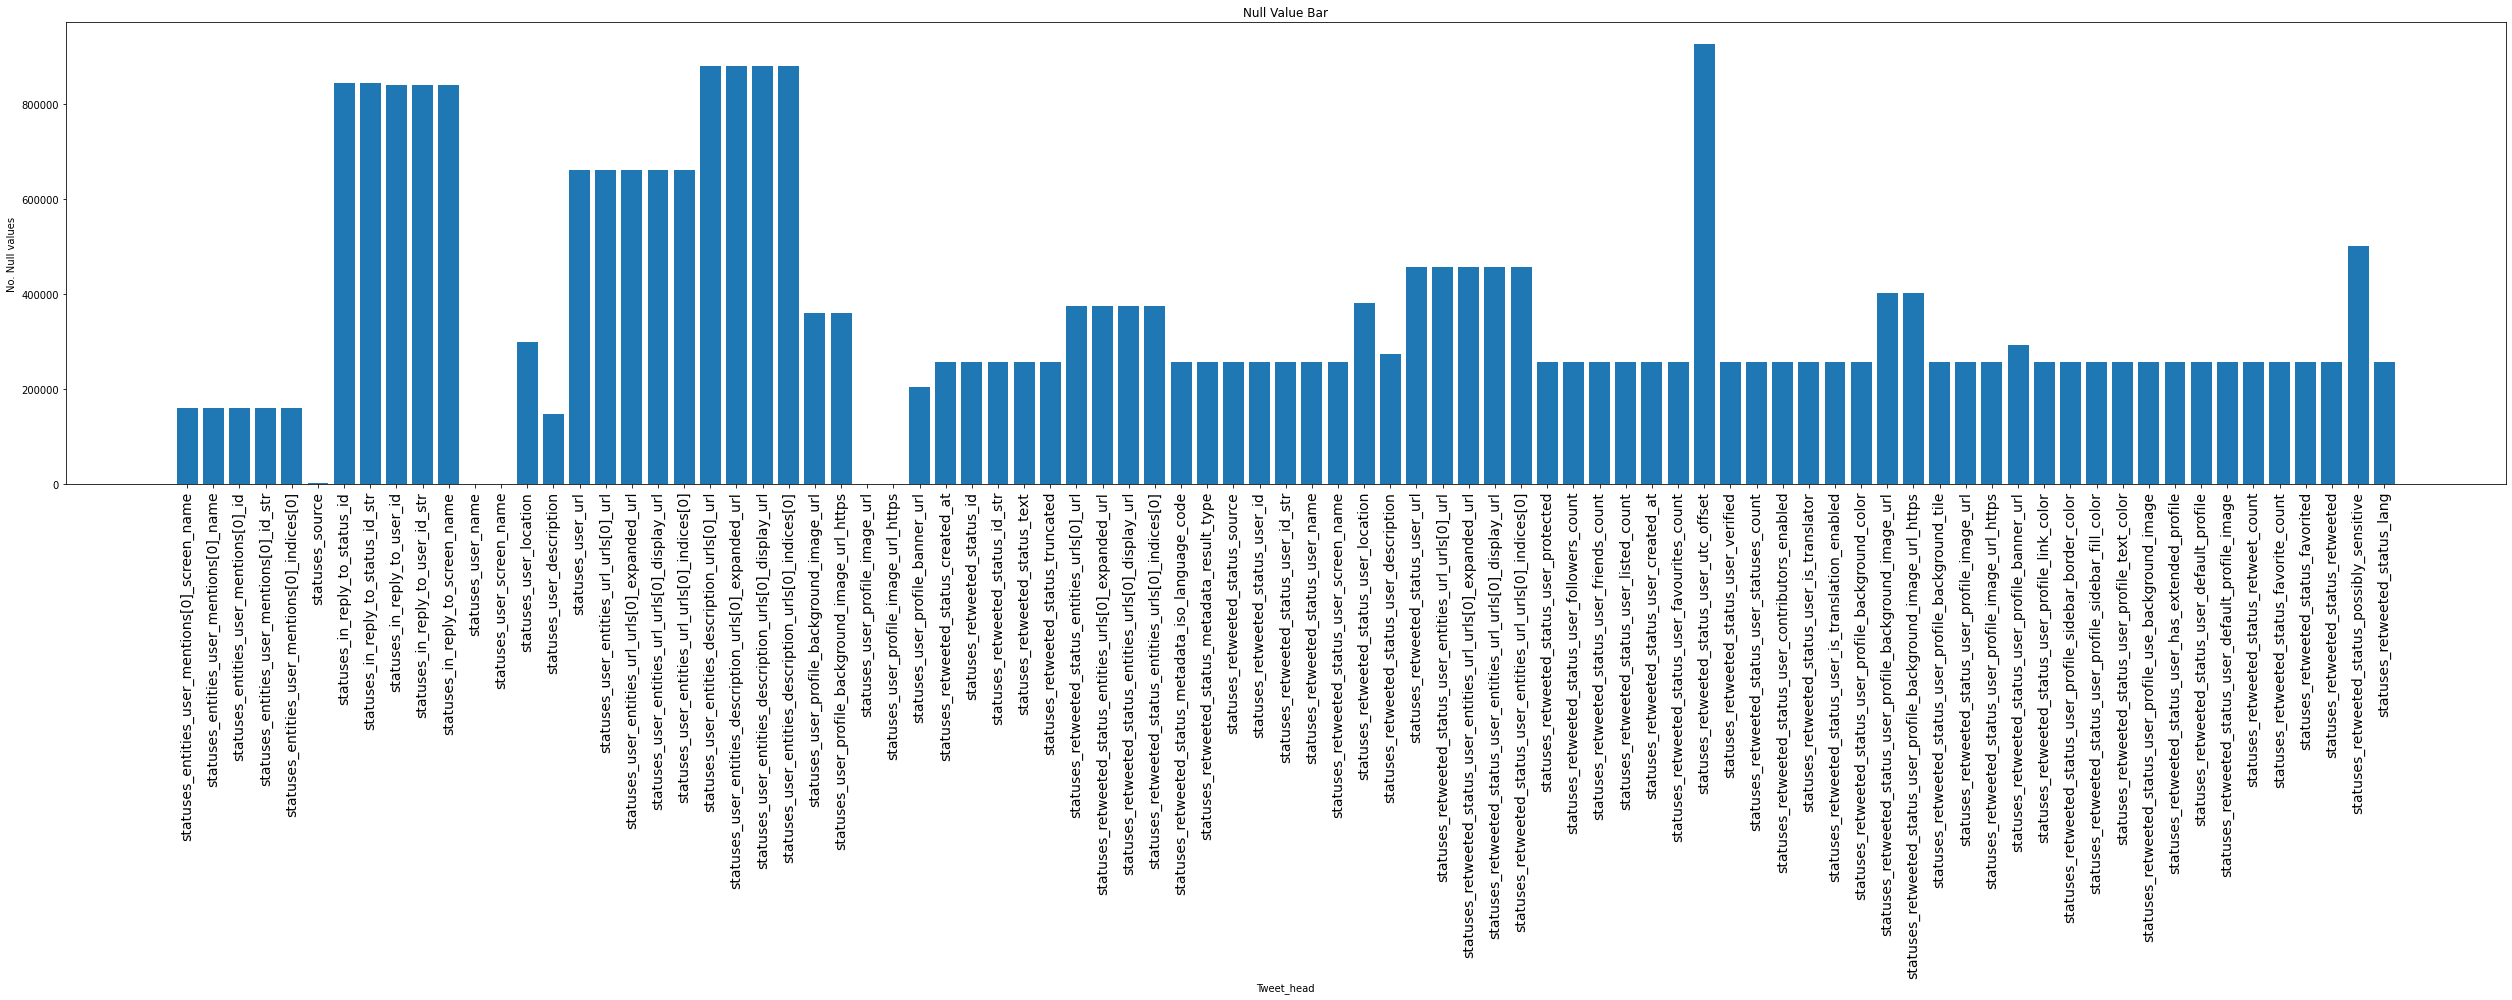

In [ ]:
#plot bar graph of the null values
ax = plt.subplots(figsize=(35,14))
plt.bar(nulls_frame['tweet_head'], nulls_frame['nul'])
plt.xlabel('Tweet_head')
plt.ylabel('No. Null values')
plt.xticks(rotation=90,fontsize = 14)
plt.title('Null Value Bar')
plt.tight_layout()
plt.show()

**Identfying columns with >80% missing values**

In [ ]:
nulls_frame['nul_perc']= (nulls_frame['nul']/len(df['input_query']))*100 # convert sum of null values into %
nul_col=[] # To store  columns name
nul_percent=[] # To store percentages

for i,j in zip(nulls_frame['nul_perc'],nulls_frame['tweet_head']):
  if i>=75: 
    nul_col.append(j)
    nul_percent.append(i)
    del df[j]

R_col = {'>80%_Nul_ColName':nul_col,'>80%_Percentage':nul_percent}
removed_col=pd.DataFrame(R_col) # data frame of Remove colums

In [ ]:
df_var=df.var()

In [ ]:
var_list=df_var.tolist()

index_var=np.where(var_list)[0]

index_to_remove=index_var.tolist()
 
list_col_to_remove=[]

columns= df.columns.tolist()

for i in index_to_remove:
    add=columns[i]
    list_col_to_remove.append(add)
    
list_col_to_remove

['input_query',
 'statuses_created_at',
 'statuses_id',
 'statuses_text',
 'statuses_truncated',
 'statuses_entities_user_mentions[0]_screen_name',
 'statuses_entities_user_mentions[0]_name',
 'statuses_entities_user_mentions[0]_indices[0]',
 'statuses_metadata_iso_language_code',
 'statuses_metadata_result_type',
 'statuses_source',
 'statuses_user_id',
 'statuses_user_id_str',
 'statuses_user_name',
 'statuses_user_screen_name',
 'statuses_user_location',
 'statuses_user_description',
 'statuses_user_url',
 'statuses_user_entities_url_urls[0]_url',
 'statuses_user_entities_url_urls[0]_expanded_url',
 'statuses_user_entities_url_urls[0]_display_url',
 'statuses_user_entities_url_urls[0]_indices[0]',
 'statuses_user_protected',
 'statuses_user_listed_count',
 'statuses_user_created_at',
 'statuses_user_favourites_count',
 'statuses_user_statuses_count',
 'statuses_user_profile_background_color',
 'statuses_user_profile_background_image_url',
 'statuses_user_profile_background_tile',
 '

**Identifying variability in the columns:**

In [ ]:
df.var()

statuses_id                                                       2.763650e+31
statuses_truncated                                                1.342391e-01
statuses_entities_user_mentions[0]_id                             2.419587e+35
statuses_entities_user_mentions[0]_id_str                         2.419587e+35
statuses_entities_user_mentions[0]_indices[0]                     1.071539e+02
statuses_user_id                                                  3.126055e+35
statuses_user_id_str                                              3.126055e+35
statuses_user_entities_url_urls[0]_indices[0]                     0.000000e+00
statuses_user_protected                                           0.000000e+00
statuses_user_followers_count                                     3.030421e+11
statuses_user_friends_count                                       5.319303e+07
statuses_user_listed_count                                        5.615558e+06
statuses_user_favourites_count                      

In [ ]:
var_0=df_var < 0.00000001

In [ ]:
var_list=var_0.tolist()

index_var=np.where(var_list)[0]

index_to_remove=index_var.tolist()
 
list_col_to_remove=[]

columns= df.columns.tolist()

for i in index_to_remove:
    add=columns[i]
    list_col_to_remove.append(add)
    
list_col_to_remove
#statuses_retweeted_status_text

['statuses_entities_user_mentions[0]_id',
 'statuses_entities_user_mentions[0]_id_str',
 'statuses_user_followers_count',
 'statuses_user_friends_count',
 'statuses_user_profile_background_image_url_https',
 'statuses_user_has_extended_profile',
 'statuses_user_default_profile',
 'statuses_retweeted_status_text',
 'statuses_retweeted_status_truncated']

In [ ]:
def get_top_abs_correlations(df, s=0,n=20):
    absolute_corr = data_heading.corr().abs().unstack()
    absolute_corr = absolute_corr.sort_values(ascending=False)
    return absolute_corr[s:n]

In [ ]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [ ]:
#Create dataframe of the undetected language
data_indet=df[df['statuses_metadata_iso_language_code']=='und']

In [ ]:
#count of the undetected languages
print("Count of undetected languages from main dataset: "+str(len(data_indet)))

Count of undetected languages from main dataset: 11054


In [ ]:
#create dataframe of non-english languages[including undetected]
data_non_eng=df[df['statuses_metadata_iso_language_code']!='en']

In [ ]:
lang_code=[] # to store detected language iso code
for i in data_non_eng['statuses_text']:

  try:
    lang = detect(i) # performing language detection
  except:
    lang="und" # put error if language is undetected/or cell is empty[any case]
    
  lang_code.append(lang)

In [ ]:
data_non_eng['LangDet_code']=lang_code #Create a column of the newly detected language iso code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Check if the detected iso code are the same as the iso code on the data
data_non_eng['Iso_Code_Comparison'] = np.where((data_non_eng['LangDet_code'] == data_non_eng['statuses_metadata_iso_language_code']), 'Yes', 'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("The size of the dataframe: " + str(len(data_non_eng)))
print("The count of un-detected texts/rows: " + str(len(data_non_eng[data_non_eng['LangDet_code']=='und'])))
print('The count of matching iso language code: '+ str(len(data_non_eng[data_non_eng['Iso_Code_Comparison']=='Yes'])))
print('The count of un-matching iso language code: '+ str(len(data_non_eng[data_non_eng['Iso_Code_Comparison']=='No'])))

The size of the dataframe: 170329
The count of un-detected texts/rows: 170329
The count of matching iso language code: 11054
The count of un-matching iso language code: 159275


In [ ]:
data_translated=data_non_eng[data_non_eng['LangDet_code']!='und'] #Exclude undetected
data_translated=data_translated[data_translated['LangDet_code']!='en'] #Excluded detected as English
print("The size of the remaining dataset after the exclusion of 'en' and 'und' texts:" + str(len(data_translated))) #Get a count

The size of the remaining dataset after the exclusion of 'en' and 'und' texts:0


In [ ]:
data_translate_en=data_non_eng[data_non_eng['LangDet_code']=='en']

In [ ]:
print("The count of the texts that are detected as english: "+str(len(data_translate_en))) #Get a count of languages detected as English

The count of the texts that are detected as english: 0


In [ ]:
data_translated=data_translated.reset_index(drop=True) #reset index

In [ ]:
translated_text=[] #To store translated text
for i in data_translated['statuses_text'].index:
    to_translate = data_translated['statuses_text'].iloc[i]
    translated="text_trans"
    #translated = GoogleTranslator(source=data_translated['LangDet_code'].iloc[i], target='en').translate(to_translate) #Perform translation
    translated_text.append(translated) #Append translated text

In [ ]:
data_translated['Translated_tweet']=translated_text # Translated text Column

In [ ]:
data_translated['statuses_text']=data_translated['Translated_tweet'].values # Overide non-english tweets with translated tweets
data_translated['statuses_metadata_iso_language_code']=data_translated['LangDet_code'].values #overide iso code with the detected iso code

In [ ]:
del data_translated['Translated_tweet'] # delete additional column[since it has overriden 'statuses_text']

In [ ]:
Translated_final=data_translated.append(data_translate_en,ignore_index = True) # Join English detected and Translated datasets

In [ ]:
#delete duplicating and non used columns on the dataset
del Translated_final['Iso_Code_Comparison'] #delete added column from the dataset
del Translated_final['LangDet_code'] #delete added column from the dataset

In [ ]:
Final_Dataset=data_en.append(Translated_final,ignore_index = True) # Join Originally English identified, Translated datasets and English detected Datasets

In [ ]:
Final_Dataset.shape

(755015, 118)

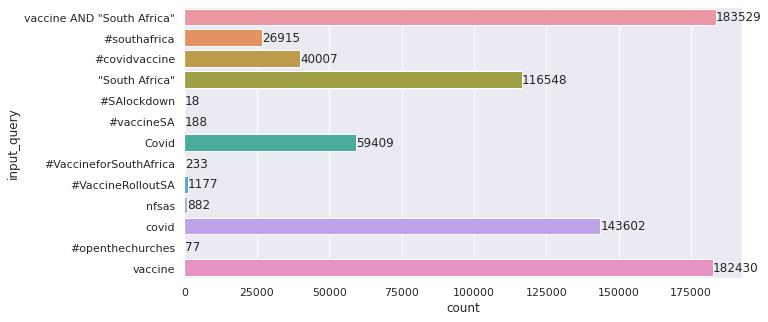

In [ ]:
sns.set(rc={"figure.figsize":(10,5)})
ax = sns.countplot(y="input_query", data=Final_Dataset)
 
for p in ax.patches:
 height = p.get_height() 
 width = p.get_width() 
 ax.text(x = width+3, 
 y = p.get_y()+(height/2),
 s = "{:.0f}".format(width), 
 va = "center")

In [ ]:
Final_Dataset['statuses_text'] = Final_Dataset['statuses_text'].str.lower()
Categorisation_dataset=Final_Dataset[(Final_Dataset['input_query']!='nfsas') & (Final_Dataset['input_query']!='#openthechurches')]

In [ ]:
HashTag_Covid=Categorisation_dataset[Categorisation_dataset['input_query']=='Covid']
HashTag_Vaccine=Categorisation_dataset[Categorisation_dataset['input_query']=='vaccine']
HashTag_SA=Categorisation_dataset[(Categorisation_dataset['input_query']=='#southafrica') | (Categorisation_dataset['input_query']=='South Africa')|(Categorisation_dataset['input_query']=='#SAlockdown')]

In [ ]:
C=HashTag_Covid['statuses_text'].str.contains('covid |vaccine| pandemic | corona| virus') 
Hash_Covid=HashTag_Covid[C]

V=HashTag_Vaccine['statuses_text'].str.contains('covid |vaccine| pandemic | corona| virus') 
Hash_Vac=HashTag_Vaccine[V]

S=HashTag_SA['statuses_text'].str.contains('covid |vaccine| pandemic | corona| virus') 
Hash_SA=HashTag_SA[S]


In [ ]:

Hash_Relevant=Final_Dataset[(Final_Dataset['input_query']=='#covidvaccine') | (Final_Dataset['input_query']=='#VaccineforSouthAfrica')|(Final_Dataset['input_query']=='#VaccineRolloutSA')|(Final_Dataset['input_query']=='#vaccineSA')|(Final_Dataset['input_query']=='vaccine AND "South Africa"')]

In [ ]:
print(len(Hash_Vac))
print(len(Hash_Covid))
print(len(Hash_SA))
print(len(Hash_Relevant))

147953
30234
1447
225134


In [ ]:
Hash_Vac=Hash_Vac.reset_index(drop=True)
Hash_Covid=Hash_Covid.reset_index(drop=True)
Hash_SA=Hash_SA.reset_index(drop=True)

In [ ]:
All_Covid_tweets=Hash_Relevant.append([Hash_SA,Hash_Vac,Hash_Covid],ignore_index=True)

In [ ]:
len(All_Covid_tweets)

404768

In [ ]:
All_Covid_tweets.head()

,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,...,statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang,sttsLang_Vs_isoCode
0,"vaccine AND ""South Africa""",Fri Jan 29 15:54:09 +0000 2021,1355182453799990016,rt @drericding: breakingâ€”single-shot johnson...,False,DrEricDing,Eric Feigl-Ding,1.883193e+07,1.883193e+07,3.0,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1267767504,1267767504,GameStonk,JesseDamiani,Views mine. He/him.,Emerging media @Forbes. EIC @TheSimule. Curato...,https://t.co/jref76s0xs,https://t.co/jref76s0xs,https://www.realitystudies.co/,realitystudies.co,0.0,https://t.co/0II6qX99k5,http://instagram.com/jessedamiani,instagram.com/jessedamiani,92.0,False,23654,584,402,Thu Mar 14 19:15:23 +0000 2013,30034,24197,...,0.0,416692.0,7655.0,5383.0,Sat Jan 10 11:01:33 +0000 2009,150600.0,NaN,1.0,40392.0,0.0,0.0,0.0,3B94D9,http://abs.twimg.com/images/themes/theme19/bg.gif,https://abs.twimg.com/images/themes/theme19/bg...,1.0,http://pbs.twimg.com/profile_images/1296690786...,https://pbs.twimg.com/profile_images/129669078...,https://pbs.twimg.com/prof

In [ ]:
Hashtags = All_Covid_tweets.groupby("input_query")
Hashtags.describe().head(10)

statuses_id                ... statuses_favorite_count         
                                 count          mean  ...                     75%      max
input_query                                           ...                                 
#SAlockdown                        1.0  1.352871e+18  ...                     0.0      0.0
#VaccineRolloutSA               1177.0  1.365777e+18  ...                     0.0   1194.0
#VaccineforSouthAfrica           233.0  1.358013e+18  ...                     0.0     12.0
#covidvaccine                  40007.0  1.365114e+18  ...                     0.0   2287.0
#southafrica                    1446.0  1.358151e+18  ...                     0.0    118.0
#vaccineSA                       188.0  1.356446e+18  ...                     0.0    400.0
Covid                          30234.0  1.359051e+18  ...                     0.0    926.0
vaccine                       147953.0  1.369391e+18  ...                     0.0  34966.0
vaccine AND "South Africa"    183529.0  1.358481e+18  ...                     0.0  24018.0

[9 rows x 376 columns]

In [ ]:
Hashtags.count().sort_values(by="statuses_id",ascending=False).head()

,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,statuses_user_profile_background_color,...,statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang,sttsLang_Vs_isoCode
input_query,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"vaccine AND ""South Africa""",183529,183529,183529,183529,158590,158599,158599,158599,158599,183529,183529,183308,7331,7331,7773,7773,7764,183529,183529,183514,183529,128401,155420,51410,51410,51373,51373,51410,9379,9379,9379,9379,183529,183529,183529,183529,183529,183529,183529,183529,...,149689,149689,149689,149689,149689,149689,0,149689,149689,149689,149689,149689,149689,135807,135807,149689,149689,149689,143957,149689,149689,149689,149689,149689,149689,149689,149689,149689,149689,149689,149689,106695,149689,183529,183529,183529,183529,183529,183529,183529
vaccine,147953,147953,147953,147953,127681,127683,127683,127683,127683,147953,147953,147690,13613,13613,14370,14370,14368,147953,147953,147942,147953,98796,123554,36717,36717,36689,36689,36717,6048,6048,6048,6048,147953,147953,147953,147953,147953,147953,147953,147953,...,112301,112301,112301,11230

In [ ]:
hash=pd.DataFrame(Hashtags.input_query)

In [ ]:
col_hash=["input query","input"]

In [ ]:
hash.columns=col_hash

In [ ]:
hash.head()

,input query,input
0,#SAlockdown,"225860 #SAlockdown Name: input_query, dtype..."
1,#VaccineRolloutSA,210331 #VaccineRolloutSA 210332 #Vaccine...
2,#VaccineforSouthAfrica,210098 #VaccineforSouthAfrica 210099 #Va...
3,#covidvaccine,141422 #covidvaccine 141423 #covidvaccin...
4,#southafrica,225134 #southafrica 225135 #southafrica ...


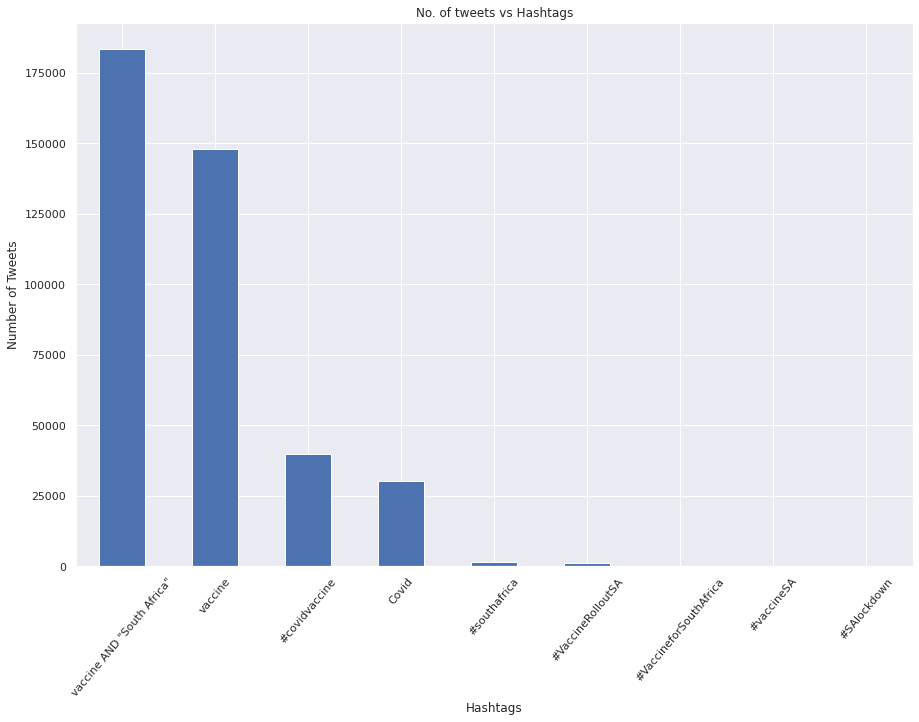

In [ ]:
plt.figure(figsize=(15,10))
Hashtags.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Hashtags")
plt.ylabel("Number of Tweets")
plt.title("No. of tweets vs Hashtags")
plt.show()

In [ ]:
import re

In [ ]:


All_Covid_tweets['statuses_text'] = All_Covid_tweets['statuses_text'].str.replace(r'[^\w\s]+', '')

All_Covid_tweets['statuses_text'] = All_Covid_tweets['statuses_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
All_Covid_tweets['statuses_text'] = All_Covid_tweets['statuses_text'].str.lower()



**Modelling Documentation**
---

The modelling part of this project is mainly based on classification  techniques in order to split betweeen several categories we just created during the EDA. The classificaion planned on the initial scooping was to classify between global and local tweets, dectect bots and sentiments analysis.

For this task we will follow certain steps in order to have proper work follow.


1.   **Data creation**


*   Feature extraction
*   categorisation


2.   **Data preration for training**


*   Data transformation
*   Data scalling
*   etc.

3. **Model training**

4.  **Model Testing**




In [ ]:
import re
import nltk
from nltk.corpus import stopwords


**GLOBAL VS LOCAL TWEETS**

For this step we are extraction SA tweets from the rest of the data in order to create binary classification for categorisation of local and global tweets

We extract the South African tweeets from the rest by filtering the tweets with common South African words. 

In [ ]:
A=All_Covid_tweets['statuses_text'].str.contains('south africa|southafrica|ramaphosa|mzansi|cyril|zuma|nzimande|eff|anc|zwelimkhize|mkhize|drzwelimkhize') 
SA_tweets=All_Covid_tweets[A]
len(SA_tweets)

151691

In [ ]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
newStopWords = ['RT','rt','capricornfmnews']
stop.extend(newStopWords)
All_Covid_tweets['statuses_without_stopwords']=All_Covid_tweets['statuses_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<BarContainer object of 2 artists>

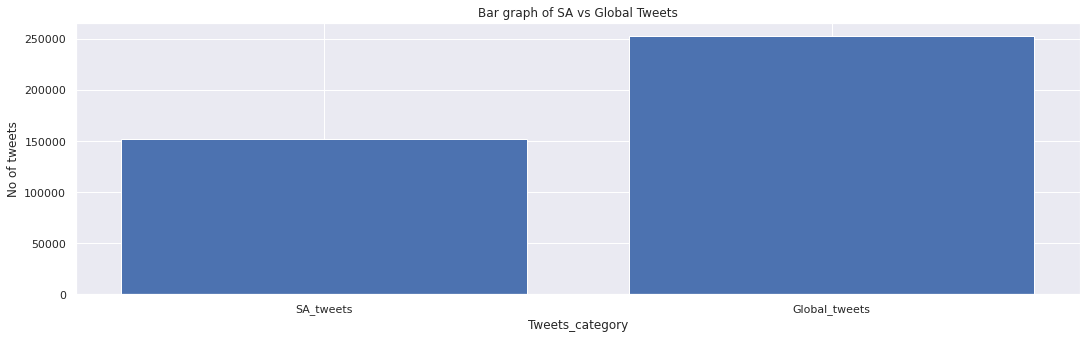

In [ ]:
tweet_cat_count = {'SA_tweets':len(SA_tweets['statuses_text']) , 'Global_tweets': -(len(SA_tweets['statuses_text'])-len(All_Covid_tweets['statuses_text']))}
tweet_cat_data = pd.DataFrame(tweet_cat_count.items(),columns=['SA_tweets','Global_tweet'])
ax = plt.subplots(figsize=(18,5))
plt.xlabel('Tweets_category')
plt.ylabel('No of tweets')
plt.title('Bar graph of SA vs Global Tweets')
plt.bar(tweet_cat_data['SA_tweets'], tweet_cat_data['Global_tweet'])                           

In [ ]:
All_Covid_tweets

,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,...,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang,sttsLang_Vs_isoCode,statuses_without_stopwords
0,"vaccine AND ""South Africa""",Fri Jan 29 15:54:09 +0000 2021,1355182453799990016,rt drericding breakingâsingleshot johnson amp ...,False,DrEricDing,Eric Feigl-Ding,1.883193e+07,1.883193e+07,3.0,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1267767504,1267767504,GameStonk,JesseDamiani,Views mine. He/him.,Emerging media @Forbes. EIC @TheSimule. Curato...,https://t.co/jref76s0xs,https://t.co/jref76s0xs,https://www.realitystudies.co/,realitystudies.co,0.0,https://t.co/0II6qX99k5,http://instagram.com/jessedamiani,instagram.com/jessedamiani,92.0,False,23654,584,402,Thu Mar 14 19:15:23 +0000 2013,30034,24197,...,416692.0,7655.0,5383.0,Sat Jan 10 11:01:33 +0000 2009,150600.0,NaN,1.0,40392.0,0.0,0.0,0.0,3B94D9,http://abs.twimg.com/images/themes/theme19/bg.gif,https://abs.twimg.com/images/themes/theme19/bg...,1.0,http://pbs.twimg.com/profile_images/1296690786...,https://pbs.twimg.com/profile_images/129669078...,https://pbs.twimg.com/profile_banners/188319

In [ ]:
df1 =pd.DataFrame(All_Covid_tweets, columns= ["statuses_text", "statuses_retweeted"])

In [ ]:
df1

,statuses_text,statuses_retweeted
0,rt drericding breakingâsingleshot johnson amp ...,False
1,rt bbcmorelle very good news on novavax vaccin...,False
2,rt voxdotcom what makes the johnson amp johnso...,False
3,rt drericding breakingâsingleshot johnson amp ...,False
4,rt jsavagetweets johnson amp johnson aka janss...,False
...,...,...
404763,rt ciana_soleil someone explain to me why the ...,False
404764,rt uni0nh0use covid started because people sto...,False
404765,rt firstgentleman i am very happy that i have ...,False
404766,rt jburnmurdoch maxcroser this is the other is...,False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404768 entries, 0 to 404767
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   statuses_text       404768 non-null  object
 1   statuses_retweeted  404768 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 3.5+ MB


In [ ]:
df1['statuses_text'][1]

'rt bbcmorelle very good news on novavax vaccine in uk trial  reduced efficacy in south africa 5060 not so great news 1 httpstâ'

In [ ]:
 df1 ["location_cat"] = df1['statuses_text'].str.contains('south africa|southafrica|ramaphosa|mzansi|cyril|zuma|nzimande|eff|anc|zwelimkhize|mkhize|drzwelimkhize')

In [ ]:
df1.describe(include= "all")

,statuses_text,statuses_retweeted,location_cat
count,404768,404768,404768
unique,122315,1,2
top,rt moderna_tx we just announced that the moder...,False,False
freq,7070,404768,253077


In [ ]:
# Categorising the tweets (Local agaisnt Global)
location_cat = []
for i,row in df1.iterrows():
  if row["location_cat"]== True:
    location_cat.append("local")
  else:
    location_cat.append("global")
    
df1 ["tweets_location"] = location_cat  

Now we have generated the global aganist international tweests.

The next step is to automate the categories.

But first we will preprocess our dataset. By spliting the data into training and test samples

In [ ]:
df1

,statuses_text,statuses_retweeted,location_cat,tweets_location
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local
...,...,...,...,...
404763,rt ciana_soleil someone explain to me why the ...,False,False,global
404764,rt uni0nh0use covid started because people sto...,False,False,global
404765,rt firstgentleman i am very happy that i have ...,False,False,global
404766,rt jburnmurdoch maxcroser this is the other is...,False,False,global


In [ ]:
#convert twitter dates to datetypes 
All_Covid_tweets['statuses_user_created_at']=pd.to_datetime(All_Covid_tweets['statuses_user_created_at']).dt.date
All_Covid_tweets['statuses_created_at']=pd.to_datetime(All_Covid_tweets['statuses_created_at']).dt.date
# calculate the number of days the profile has been in use
All_Covid_tweets['profile_in_use']=All_Covid_tweets['statuses_created_at']-All_Covid_tweets['statuses_user_created_at']
All_Covid_tweets['profile_in_use']=pd.to_numeric(All_Covid_tweets['profile_in_use'].dt.days,downcast='integer')
All_Covid_tweets['messages_per_day']=All_Covid_tweets['statuses_user_statuses_count']/All_Covid_tweets['profile_in_use']
#create variable in human or bot
df1['message_creator']=All_Covid_tweets['messages_per_day'].apply(lambda x: 'Bot' if x > 72 else 'Human' )

In [ ]:
df1

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human
...,...,...,...,...,...
404763,rt ciana_soleil someone explain to me why the ...,False,False,global,Human
404764,rt uni0nh0use covid started because people sto...,False,False,global,Human
404765,rt firstgentleman i am very happy that i have ...,False,False,global,Human
404766,rt jburnmurdoch maxcroser this is the other is...,False,False,global,Human


In [ ]:
df1.to_csv('/content/drive/Shareddrives/MIT808 - group 6/Categories.csv', index=False, encoding='utf-8-sig')

**COVID-19 TOPIC MODELLING**

In this section we identify the topics that were most discussed Globally and Locally, we will also explore if the topics that where disccussed globally and locally.

**Hashtags**
In terms of hanshtags and pretrained topics we can answer the following objectives:

> Can we follow the trend of hashtags globally and locally?

> Does hashtags contain the topic conten?

In [ ]:
S_tweet = SA_tweets.groupby("input_query")
S_tweet.describe().head(10)
S_tweet.count().sort_values(by="statuses_id",ascending=False).head()

,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,statuses_user_profile_background_color,...,statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang,sttsLang_Vs_isoCode
input_query,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"vaccine AND ""South Africa""",132543,132543,132543,132543,113686,113693,113693,113693,113693,132543,132543,132384,4583,4583,4854,4854,4847,132543,132543,132534,132543,93304,112697,36888,36888,36857,36857,36888,6780,6780,6780,6780,132543,132543,132543,132543,132543,132543,132543,132543,...,107793,107793,107793,107793,107793,107793,0,107793,107793,107793,107793,107793,107793,97436,97436,107793,107793,107793,103588,107793,107793,107793,107793,107793,107793,107793,107793,107793,107793,107793,107793,73521,107793,132543,132543,132543,132543,132543,132543,132543
vaccine,11659,11659,11659,11659,10123,10125,10125,10125,10125,11659,11659,11640,1045,1045,1122,1122,1120,11659,11659,11657,11659,7865,9625,2974,2974,2972,2972,2974,487,487,487,487,11659,11659,11659,11659,11659,11659,11659,11659,...,8945,8945,8945,8945,8945,8945,0,8945,8945,8945,8945,8945,8945,7960,7960

In [ ]:
S_tweet_df=pd.DataFrame(S_tweet.input_query)

In [ ]:
col_stweet=["input query", "input"]

In [ ]:
S_tweet_df.columns=col_stweet

In [ ]:
S_tweet_df.head()

,input query,input
0,#VaccineRolloutSA,210338 #VaccineRolloutSA 210345 #Vaccine...
1,#VaccineforSouthAfrica,210098 #VaccineforSouthAfrica 210101 #Va...
2,#covidvaccine,141465 #covidvaccine 141466 #covidvaccin...
3,#southafrica,225137 #southafrica 225141 #southafrica ...
4,#vaccineSA,209910 #vaccineSA 209911 #vaccineSA 2099...


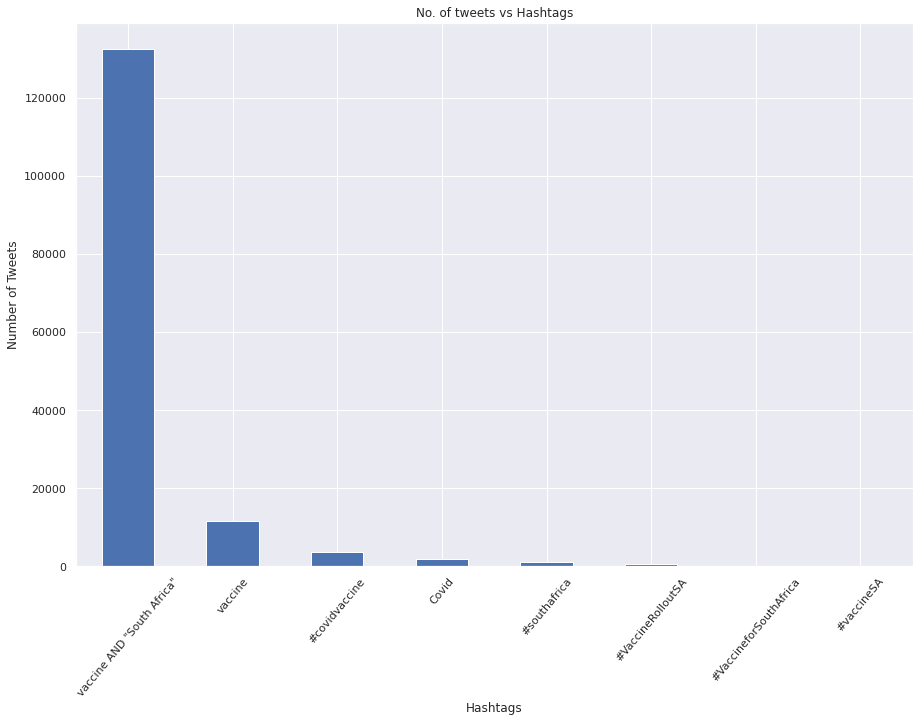

In [ ]:
plt.figure(figsize=(15,10))
S_tweet.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Hashtags")
plt.ylabel("Number of Tweets")
plt.title("No. of tweets vs Hashtags")
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
SA_tweets

,input_query,statuses_created_at,statuses_id,statuses_text,statuses_truncated,statuses_entities_user_mentions[0]_screen_name,statuses_entities_user_mentions[0]_name,statuses_entities_user_mentions[0]_id,statuses_entities_user_mentions[0]_id_str,statuses_entities_user_mentions[0]_indices[0],statuses_metadata_iso_language_code,statuses_metadata_result_type,statuses_source,statuses_in_reply_to_status_id,statuses_in_reply_to_status_id_str,statuses_in_reply_to_user_id,statuses_in_reply_to_user_id_str,statuses_in_reply_to_screen_name,statuses_user_id,statuses_user_id_str,statuses_user_name,statuses_user_screen_name,statuses_user_location,statuses_user_description,statuses_user_url,statuses_user_entities_url_urls[0]_url,statuses_user_entities_url_urls[0]_expanded_url,statuses_user_entities_url_urls[0]_display_url,statuses_user_entities_url_urls[0]_indices[0],statuses_user_entities_description_urls[0]_url,statuses_user_entities_description_urls[0]_expanded_url,statuses_user_entities_description_urls[0]_display_url,statuses_user_entities_description_urls[0]_indices[0],statuses_user_protected,statuses_user_followers_count,statuses_user_friends_count,statuses_user_listed_count,statuses_user_created_at,statuses_user_favourites_count,statuses_user_statuses_count,...,statuses_retweeted_status_user_protected,statuses_retweeted_status_user_followers_count,statuses_retweeted_status_user_friends_count,statuses_retweeted_status_user_listed_count,statuses_retweeted_status_user_created_at,statuses_retweeted_status_user_favourites_count,statuses_retweeted_status_user_utc_offset,statuses_retweeted_status_user_verified,statuses_retweeted_status_user_statuses_count,statuses_retweeted_status_user_contributors_enabled,statuses_retweeted_status_user_is_translator,statuses_retweeted_status_user_is_translation_enabled,statuses_retweeted_status_user_profile_background_color,statuses_retweeted_status_user_profile_background_image_url,statuses_retweeted_status_user_profile_background_image_url_https,statuses_retweeted_status_user_profile_background_tile,statuses_retweeted_status_user_profile_image_url,statuses_retweeted_status_user_profile_image_url_https,statuses_retweeted_status_user_profile_banner_url,statuses_retweeted_status_user_profile_link_color,statuses_retweeted_status_user_profile_sidebar_border_color,statuses_retweeted_status_user_profile_sidebar_fill_color,statuses_retweeted_status_user_profile_text_color,statuses_retweeted_status_user_profile_use_background_image,statuses_retweeted_status_user_has_extended_profile,statuses_retweeted_status_user_default_profile,statuses_retweeted_status_user_default_profile_image,statuses_retweeted_status_retweet_count,statuses_retweeted_status_favorite_count,statuses_retweeted_status_favorited,statuses_retweeted_status_retweeted,statuses_retweeted_status_possibly_sensitive,statuses_retweeted_status_lang,statuses_is_quote_status,statuses_retweet_count,statuses_favorite_count,statuses_favorited,statuses_retweeted,statuses_lang,sttsLang_Vs_isoCode
0,"vaccine AND ""South Africa""",Fri Jan 29 15:54:09 +0000 2021,1355182453799990016,rt drericding breakingâsingleshot johnson amp ...,False,DrEricDing,Eric Feigl-Ding,1.883193e+07,1.883193e+07,3.0,en,recent,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1267767504,1267767504,GameStonk,JesseDamiani,Views mine. He/him.,Emerging media @Forbes. EIC @TheSimule. Curato...,https://t.co/jref76s0xs,https://t.co/jref76s0xs,https://www.realitystudies.co/,realitystudies.co,0.0,https://t.co/0II6qX99k5,http://instagram.com/jessedamiani,instagram.com/jessedamiani,92.0,False,23654,584,402,Thu Mar 14 19:15:23 +0000 2013,30034,24197,...,0.0,416692.0,7655.0,5383.0,Sat Jan 10 11:01:33 +0000 2009,150600.0,NaN,1.0,40392.0,0.0,0.0,0.0,3B94D9,http://abs.twimg.com/images/themes/theme19/bg.gif,https://abs.twimg.com/images/themes/theme19/bg...,1.0,http://pbs.twimg.com/profile_images/1296690786...,https://pbs.twimg.com/profile_images/129669078...,https://pbs.twimg.com/prof

**Human VS Bots**

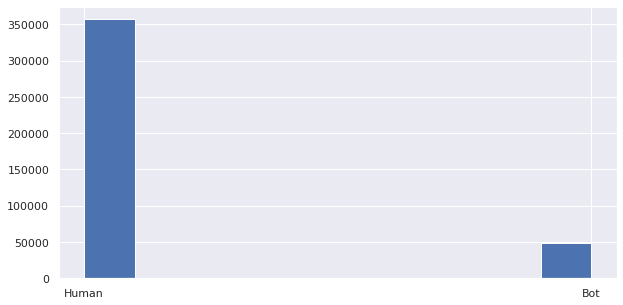

In [ ]:
df1.message_creator.hist()

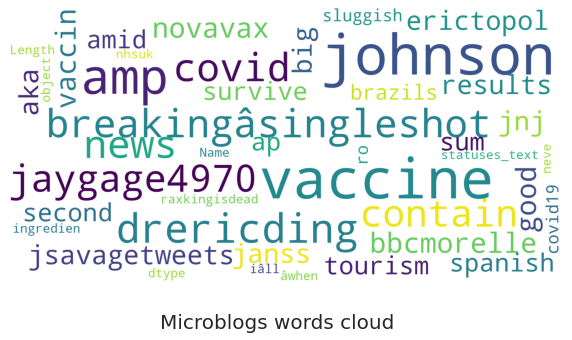

In [ ]:
show_wordcloud(SA_tweets.statuses_text, "Microblogs words cloud")